c:\Users\user\Programming\Git\HHG\Solve.py:71: RuntimeWarning: overflow encountered in multiply
  psi = la.solve_banded((1,1),A, B.dot(psi) - 1j*self.delta_t * (1.5 * fpsi - 0.5 * fpsi_old),\
c:\Users\user\Programming\Git\HHG\Solve.py:71: RuntimeWarning: invalid value encountered in multiply
  psi = la.solve_banded((1,1),A, B.dot(psi) - 1j*self.delta_t * (1.5 * fpsi - 0.5 * fpsi_old),\


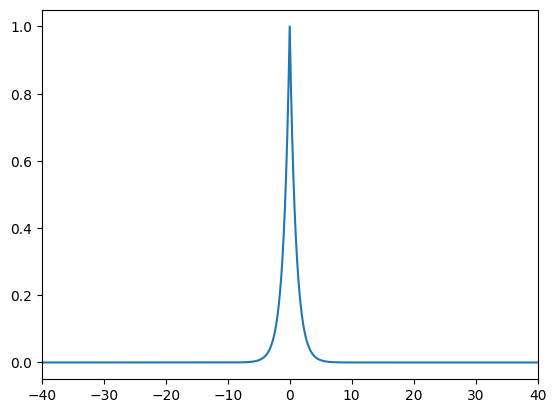

In [7]:
from Solve import psi
import numpy as np
n = 12000
wavefunction, x, t = psi([-200, 4096, -300, n])

import matplotlib.pyplot as plt
for i in range(0, n, 10**5):
    plt.plot(x, abs(wavefunction[i]))
plt.xlim(-40, 40)
#plt.ylim(0, 5)
plt.show()

In [ ]:
from Res_visualisation import *
from Parameters import pars_YanPengPhysRevA_78_033821
from Hydrogen import Hydrogen
from Field import Field

params = pars_YanPengPhysRevA_78_033821()[0]
H = Hydrogen()
F = Field.Pulse(params)
field = F(t, 'Real')
pot = H.potential(x)
plot_HH_spectrum(x, t, wavefunction, params, pot, field, Z=1)
imshow_time_frequency_characteristics(x, t, wavefunction, params, pot, field)

c:\Users\user\Programming\Git\HHG\Res_visualisation.py:8: RuntimeWarning: overflow encountered in multiply
  a = np.trapz(-wavefunction * dV_dx[np.newaxis,:] * np.conj(wavefunction), x[np.newaxis,:], axis=1)
c:\Users\user\Programming\Git\HHG\Res_visualisation.py:8: RuntimeWarning: invalid value encountered in multiply
  a = np.trapz(-wavefunction * dV_dx[np.newaxis,:] * np.conj(wavefunction), x[np.newaxis,:], axis=1)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4979: RuntimeWarning: overflow encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4979: RuntimeWarning: invalid value encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4979: RuntimeWarning: invalid value encou

0
